<a href="https://colab.research.google.com/github/satriayyp/PCVK_Ganjil_2023/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

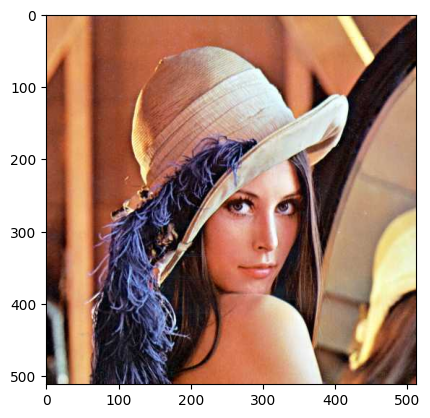

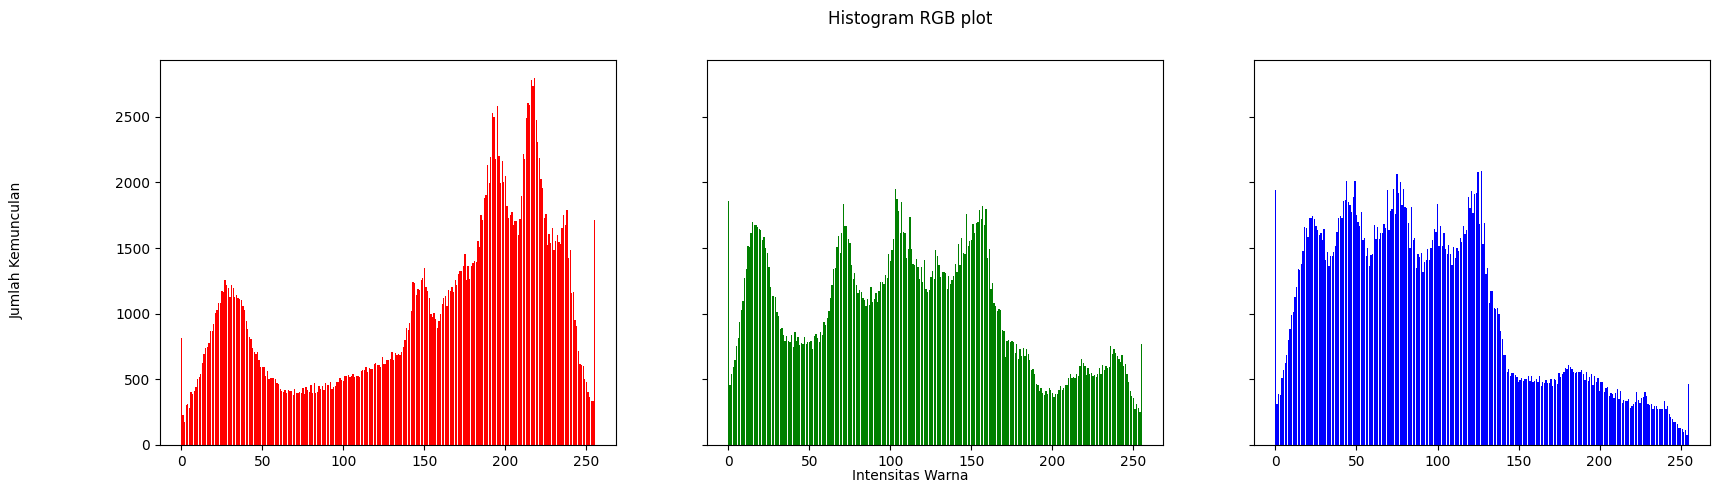

In [2]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/lena.jpg')
img1 = cv.cvtColor(image,cv.COLOR_BGR2RGB)
plt.imshow(img1)
height, width, depth = np.shape(image)
names =np.arange(256)

blue=[0]*256
green=[0]*256
red=[0]*256
for y in range(0,height):
  for x in range(0,width):
    blue[image[y][x][0]] += 1
    green[image[y][x][1]]+=1
    red[image[y][x][2]]+=1

fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

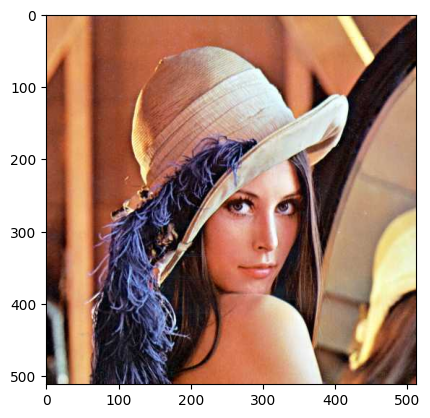

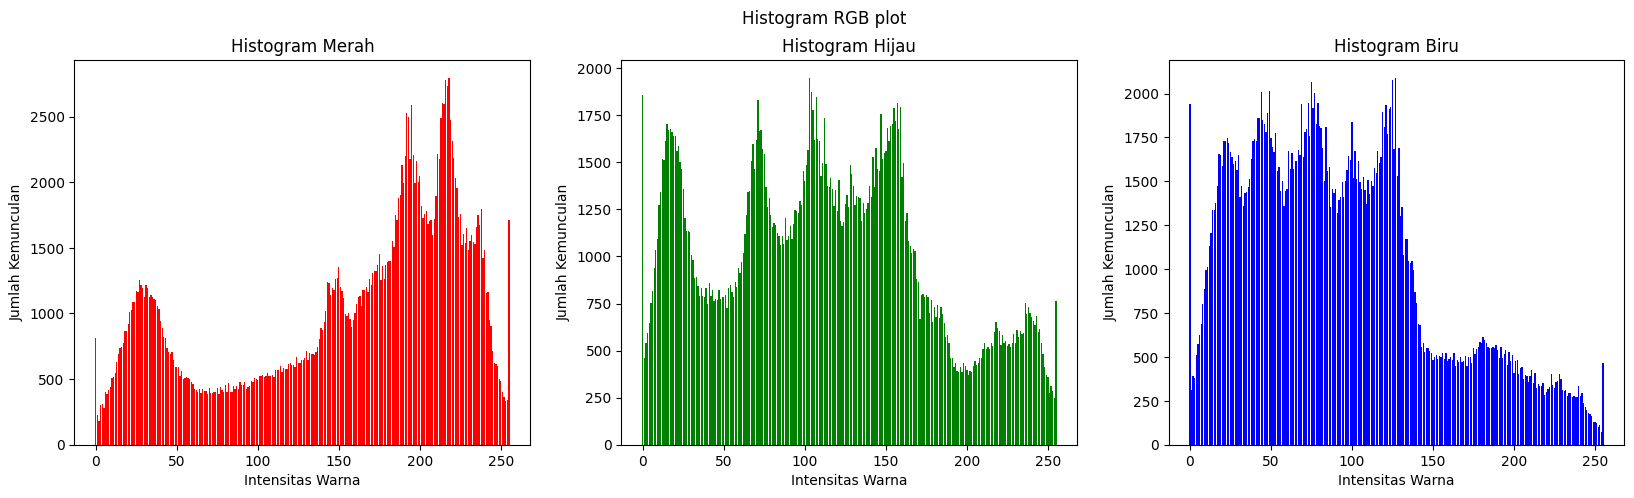

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/lena.jpg')
img1 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(img1)
height, width, _ = np.shape(image)
names = np.arange(256)

# Menghitung histogram untuk masing-masing saluran warna
hist_red = np.histogram(image[:, :, 2].ravel(), bins=256, range=(0, 256))[0]
hist_green = np.histogram(image[:, :, 1].ravel(), bins=256, range=(0, 256))[0]
hist_blue = np.histogram(image[:, :, 0].ravel(), bins=256, range=(0, 256))[0]

# Menampilkan histogram RGB plot
plt.figure(figsize=[20, 5])
plt.suptitle('Histogram RGB plot')
plt.subplot(131)
plt.bar(names, hist_red, color='red')
plt.title('Histogram Merah')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.subplot(132)
plt.bar(names, hist_green, color='green')
plt.title('Histogram Hijau')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.subplot(133)
plt.bar(names, hist_blue, color='blue')
plt.title('Histogram Biru')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.show()


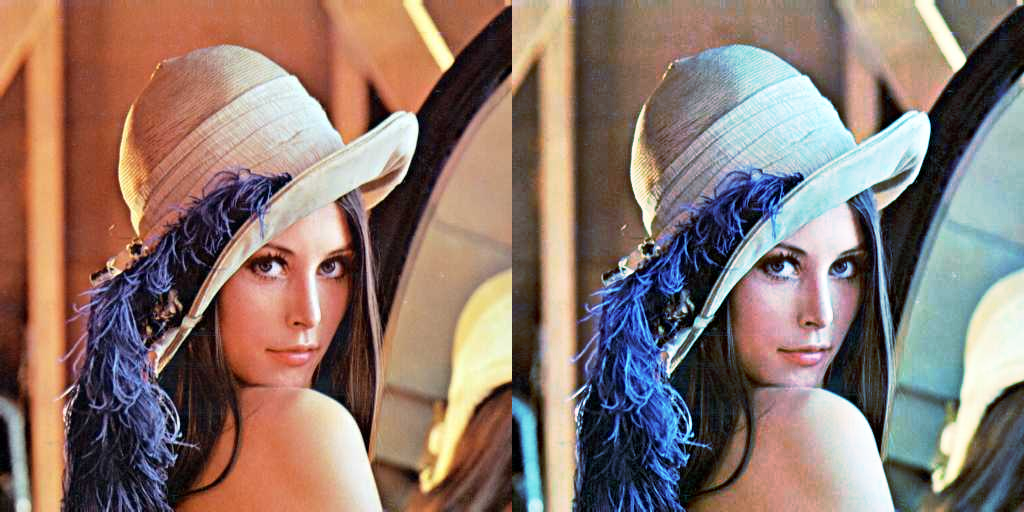

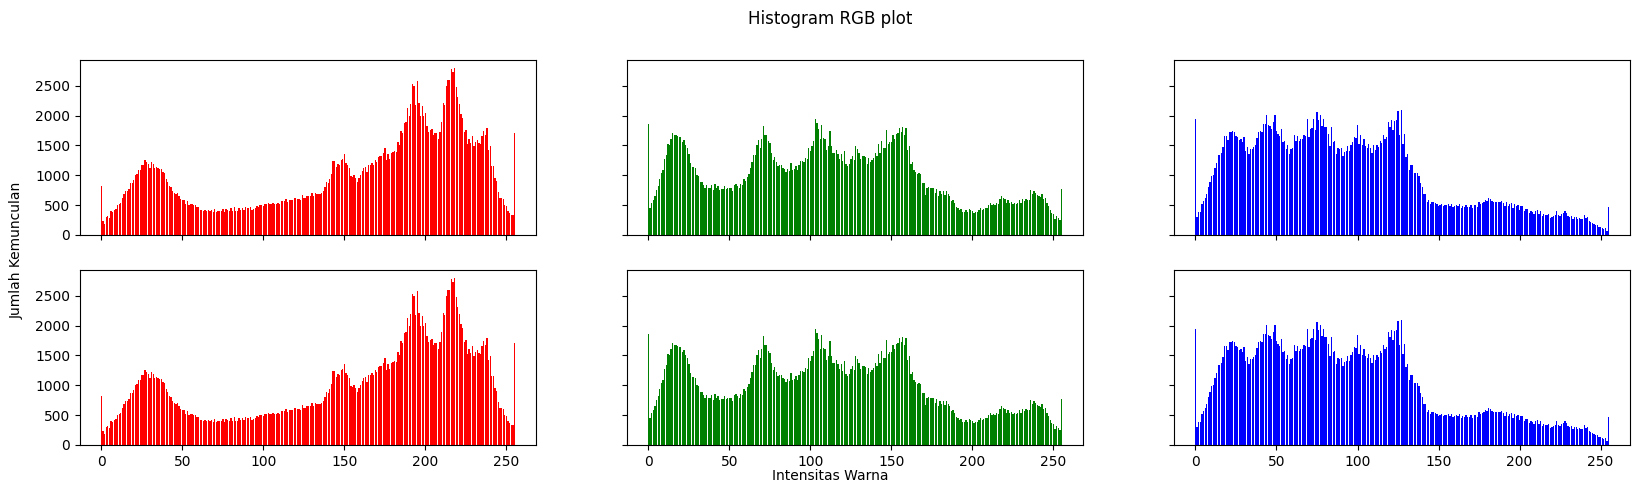

In [27]:
# 6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

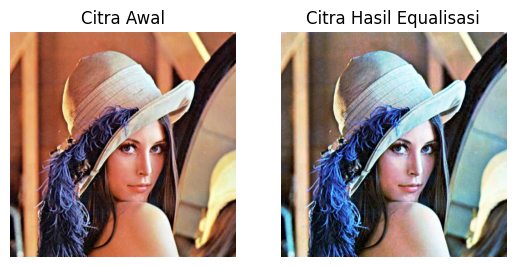

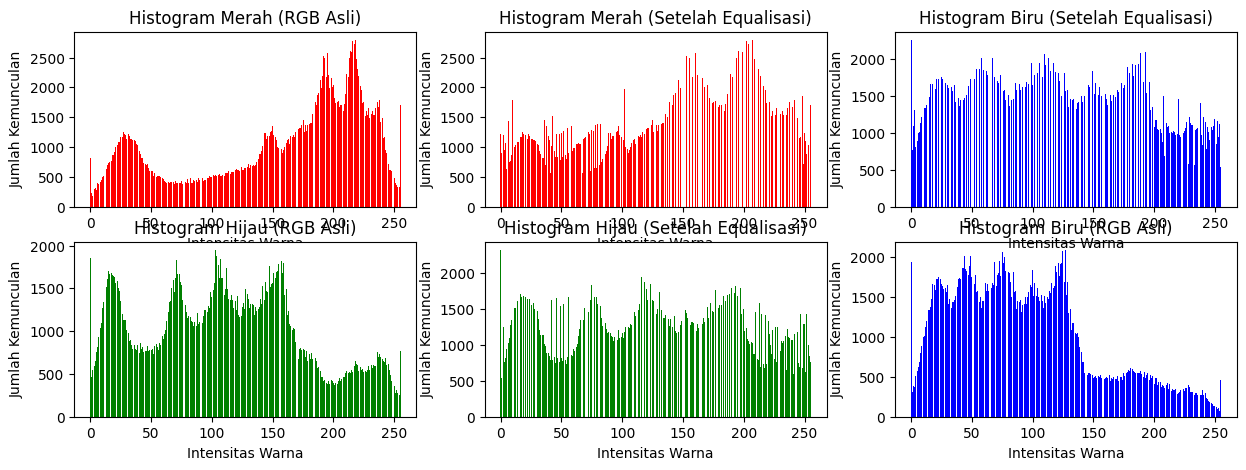

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/lena.jpg')

def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

histo_asli = histog(image)
# Pisahkan saluran warna (merah, hijau, biru)
b, g, r = cv.split(image)

# Histogram Equalization pada setiap saluran warna
equalized_r = cv.equalizeHist(r)
equalized_g = cv.equalizeHist(g)
equalized_b = cv.equalizeHist(b)

# Gabungkan kembali citra
equalized_image = cv.merge((equalized_b, equalized_g, equalized_r))



# Menghitung histogram untuk citra yang sudah diequalisasi
equal_histo = histog(equalized_image)

# Menampilkan citra asli
plt.subplot(121)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Citra Awal')
plt.axis('off')

# Menampilkan citra hasil equalisasi
plt.subplot(122)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.title('Citra Hasil Equalisasi')
plt.axis('off')
plt.figure(figsize=(15, 5))

# Menampilkan histogram RGB asli
plt.subplot(231)
plt.bar(range(256), histo_asli[2], color='red')
plt.title('Histogram Merah (RGB Asli)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(234)
plt.bar(range(256), histo_asli[1], color='green')
plt.title('Histogram Hijau (RGB Asli)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(236)
plt.bar(range(256), histo_asli[0], color='blue')
plt.title('Histogram Biru (RGB Asli)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan histogram RGB setelah equalisasi
plt.subplot(232)
plt.bar(range(256), equal_histo[2], color='red')
plt.title('Histogram Merah (Setelah Equalisasi)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(235)
plt.bar(range(256), equal_histo[1], color='green')
plt.title('Histogram Hijau (Setelah Equalisasi)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(233)
plt.bar(range(256), equal_histo[0], color='blue')
plt.title('Histogram Biru (Setelah Equalisasi)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.show()


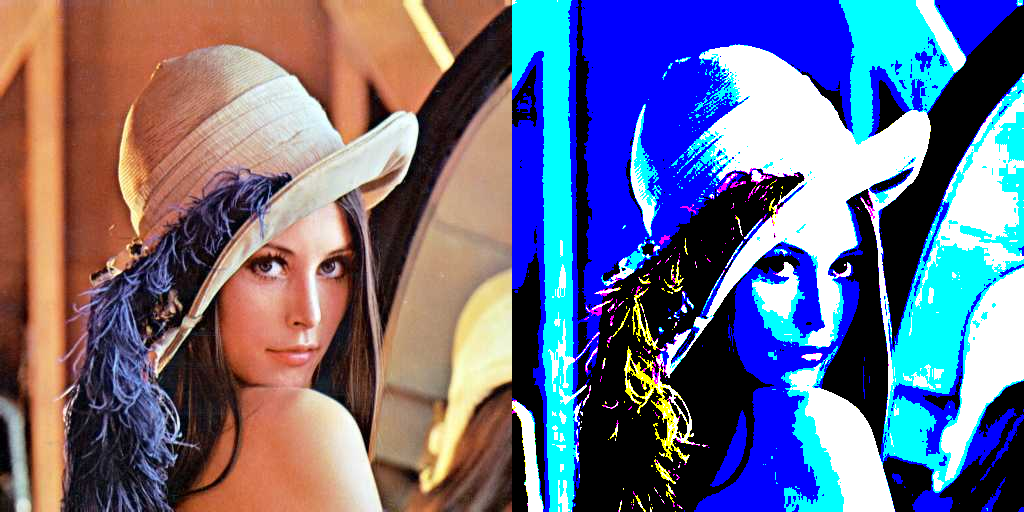

In [26]:
# 7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)
import cv2 as cv
import numpy as np

def warnaTerdekat(r, g, b):
    minDistance = float('inf')
    nearest_color = [0, 0, 0]
    warnaPallette = [[0, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]

    for color in warnaPallette:
        rDiff = r - color[2]
        gDiff = g - color[1]
        bDiff = b - color[0]
        distance = rDiff * rDiff + gDiff * gDiff + bDiff * bDiff

        if distance < minDistance:
            minDistance = distance
            nearest_color = color

    return nearest_color

# Membaca gambar
img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/lena.jpg')
img_16 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(img_16.shape[0]):
    for x in range(img_16.shape[1]):
        r, g, b = img_16[y, x]
        closest_color = warnaTerdekat(r, g, b)
        img_8[y, x] = closest_color

# Menampilkan gambar asli dan gambar hasil pemetaan warna
final_frame = cv.hconcat((img1, cv.cvtColor(img_8, cv.COLOR_BGR2RGB)))
cv2_imshow(final_frame)


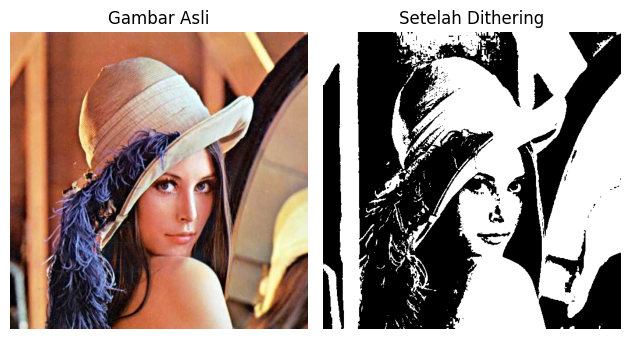

In [42]:
# 8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/lena.jpg')

# Konversi gambar ke citra grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Terapkan dithering Floyd-Steinberg
_, dithered_image = cv.threshold(gray_image, 128, 128, cv.THRESH_BINARY)

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

# Tampilkan gambar setelah dithering
plt.subplot(1, 2, 2)
plt.title('Setelah Dithering')
plt.imshow(dithered_image, cmap='gray')
plt.axis('off')

# Tampilkan plot
plt.tight_layout()
plt.show()


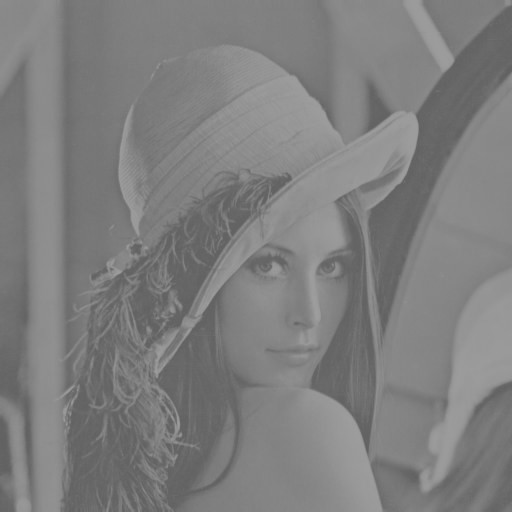

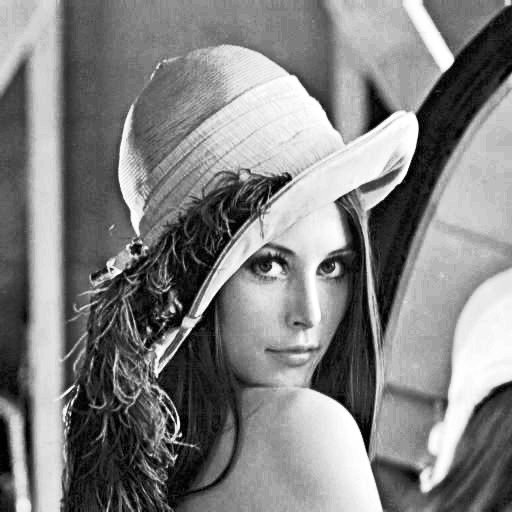

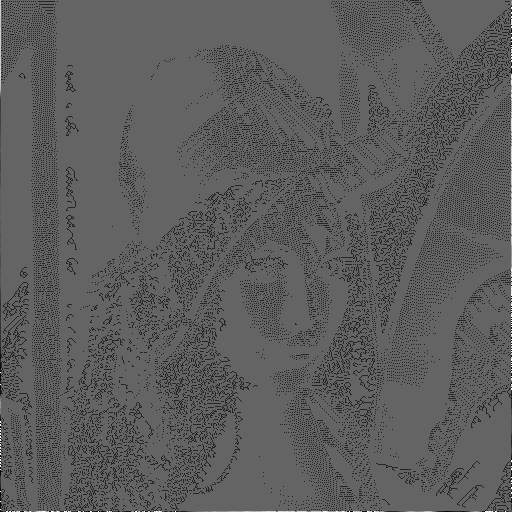

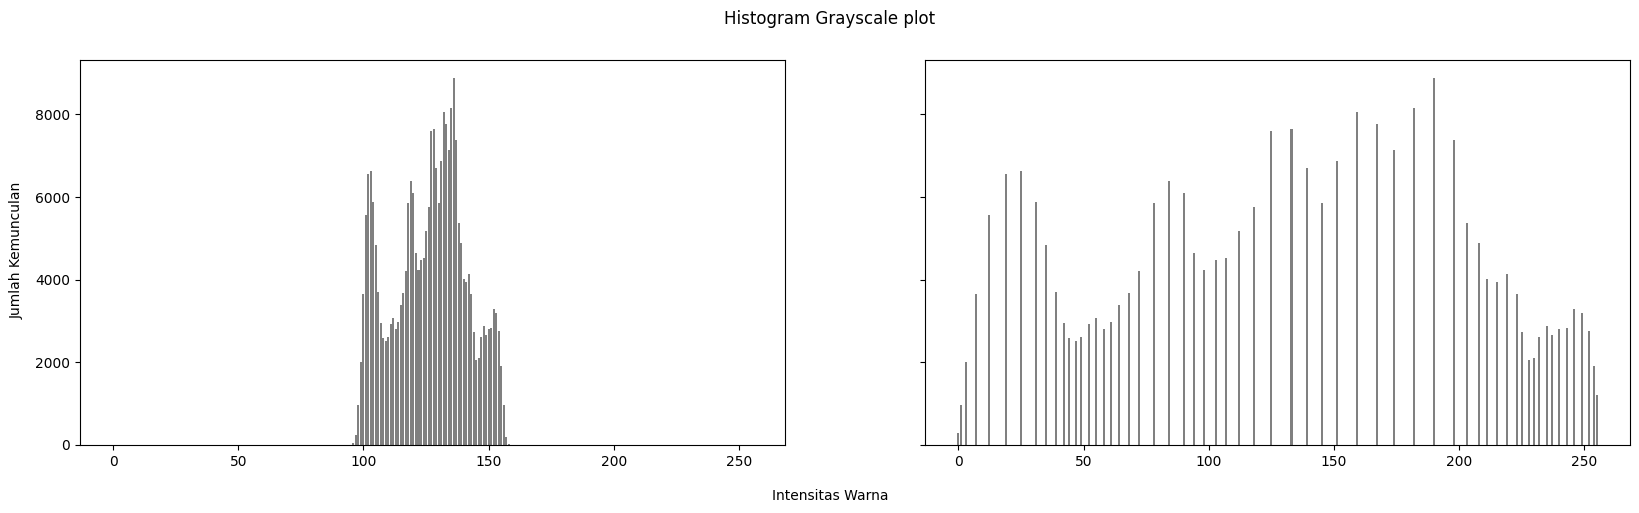

In [ ]:
# 9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Baca citra asli
image = cv2.imread("/content/drive/MyDrive/content/Images/lena_lc.jpg", cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv2.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv2.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Tampilkan citra hasil
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)

plt.show()

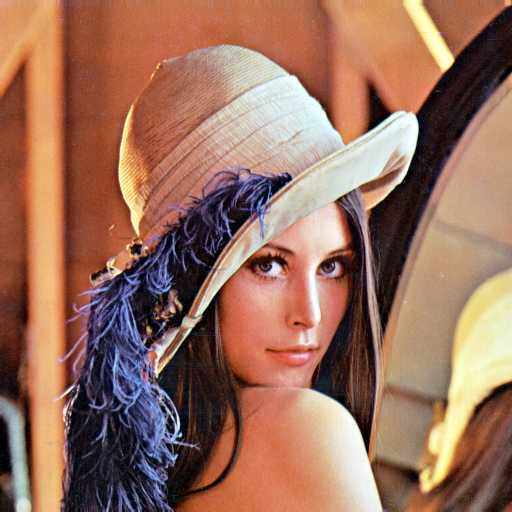

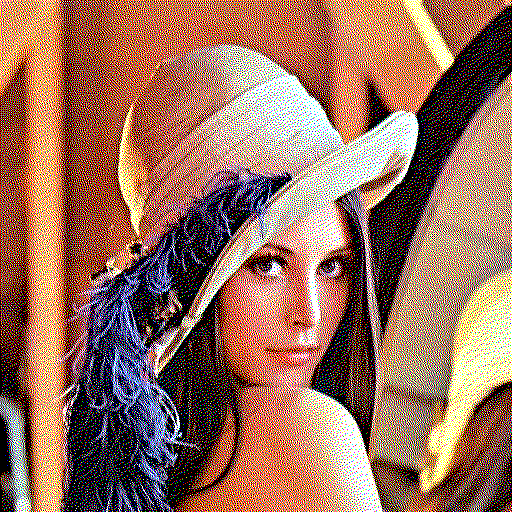

255


In [8]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/lena.jpg')

# Konversi ke tipe float
img_float = np.float64(img)

# Ukuran gambar
height, width, channels = img.shape

# Proses dithering Floyd and Steinberg pada setiap saluran warna
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop untuk setiap saluran warna (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Konversi kembali ke tipe uint8
output_img = np.uint8(img_float)

# Menampilkan gambar awal dan hasil dithering
cv2_imshow(img)
cv2_imshow(output_img)
print(new_value)